In [5]:
from food_dataset import FoodDataset
from food_model import FoodModel_1, FoodModel_2
from train_settings import TrainSettings
from training_loop import TrainingLoop
import constants
from matplotlib import pyplot as plt
from train_logic import TrainLogic, TrainLogicImplementation, MockTrainLogic
from torchvision import transforms


In [ ]:
path=constants.dataset_root

transform = transforms.Compose([
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.RandomHorizontalFlip(),      # Randomly flip horizontally
    transforms.RandomRotation(30),             # Randomly rotate
    transforms.Resize((260,260)),                # Resize to 256x256
    transforms.RandomCrop((256,256)),                # Resize to 256x256
    transforms.Resize((256,256)),                # Resize to 256x256
    transforms.CenterCrop(224),           # Crop to 224x224
    transforms.ToTensor(),                # Convert to tensor
    transforms.Normalize(                  # Normalize
        mean=[0.485, 0.456, 0.406],       # Standard ImageNet normalization
        std=[0.229, 0.224, 0.225]
   )
])

dt_train = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transform)

dt_original = FoodDataset(path,
                       constants.min_class_names,
                       constants.min_class_labels,
                       0,
                       10,
                       transforms.ToTensor())

dt_val = FoodDataset(path,
                     constants.min_class_names,
                     constants.min_class_labels,
                     10,
                     5,
                     transform)

dt_test = FoodDataset(path,
                      constants.min_class_names,
                      constants.min_class_labels,
                      10,
                      5,
                      transform)

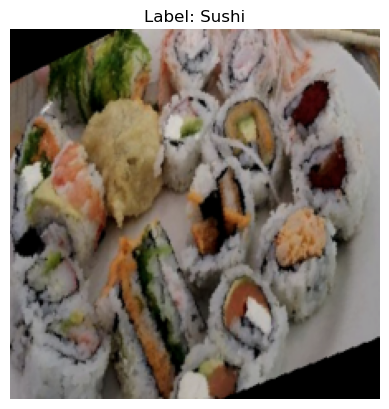

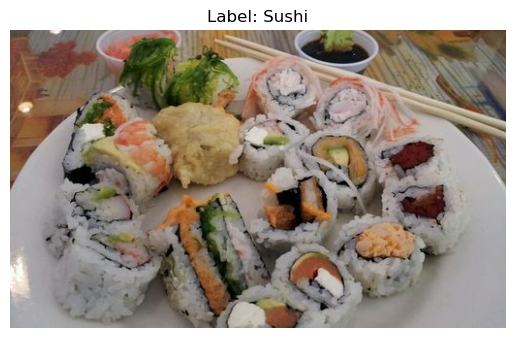

In [80]:
import numpy as np
import random
rand_idx = random.randint(0, len(dt_train))
def plot_normalized_image(image, label):
    # Denormalize the image tensor (assuming it was normalized with mean and std)
    image = image.permute(1, 2, 0)
    image = image.clip(0, 1)  # Ensure values are in the range [0, 1]
    
    
    plt.figure()
    plt.imshow(image)
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

# Example usage
plot_normalized_image(dt_train[rand_idx][0], dt_train.get_class_label(dt_train[rand_idx][1]))
plot_normalized_image(dt_original[rand_idx][0], dt_original.get_class_label(dt_original[rand_idx][1]))

In [3]:
model = FoodModel_2(10)
sum(p.numel() for p in model.parameters() if p.requires_grad)

18482186

In [5]:

from evaluator import AccuracyEvaluator


settings = TrainSettings("trying_out",
                         model,
                         dt_train,
                         dt_val,
                         device="cpu",
                         lr=0.001,
                         epochs=20,
                         save_after_epoch=5,
                         eval_after_epoch=1,
                         save_path=constants.save_path,
                        # print_after_steps=1,
                         print_memory=True,
                         batch_size=30)

training = TrainingLoop(settings, TrainLogicImplementation(), [AccuracyEvaluator()])  #MockTrainLogic(len(settings.train_data), settings.batch_size, delay=0.0, overfit=10 ))

training.train()

Training trying_out for 20 epochs
Training on cpu
[21:22:19] Epoch 1/20, Ellapsed 00:18 seconds, Train Loss: 7.7204, Validation Loss: 3.8264 Evaluations: [('ACC', 0.1)] ETA: 05:46
[21:22:38] Epoch 2/20, Ellapsed 00:36 seconds, Train Loss: 3.9846, Validation Loss: 3.2257 Evaluations: [('ACC', 0.1)] ETA: 05:29
[21:22:55] Epoch 3/20, Ellapsed 00:54 seconds, Train Loss: 2.7887, Validation Loss: 2.7838 Evaluations: [('ACC', 0.12)] ETA: 05:07
[21:23:14] Epoch 4/20, Ellapsed 01:13 seconds, Train Loss: 2.3417, Validation Loss: 3.0436 Evaluations: [('ACC', 0.1)] ETA: 04:52
Model saved at /media/filestorage/code/projects/food101/trying_out_epoch_5_1_.pth after epoch 5.
[21:23:32] Epoch 5/20, Ellapsed 01:31 seconds, Train Loss: 2.1078, Validation Loss: 3.7577 Evaluations: [('ACC', 0.12)] ETA: 04:33
[21:23:52] Epoch 6/20, Ellapsed 01:50 seconds, Train Loss: 1.9916, Validation Loss: 3.6099 Evaluations: [('ACC', 0.08)] ETA: 04:18


KeyboardInterrupt: 

In [ ]:
training.train(30)

Training trying_out for 30 epochs
Training on cpu
[21:09:57] Epoch 21/30, Ellapsed 00:08 seconds, Train Loss: 0.5008, Validation Loss: 7.3421 Evaluations: [] ETA: 00:03
[21:10:05] Epoch 22/30, Ellapsed 00:16 seconds, Train Loss: 0.4401, Validation Loss: 7.6136 Evaluations: [] ETA: 00:06
[21:10:13] Epoch 23/30, Ellapsed 00:24 seconds, Train Loss: 0.4273, Validation Loss: 7.9166 Evaluations: [] ETA: 00:07
[21:10:21] Epoch 24/30, Ellapsed 00:32 seconds, Train Loss: 0.4346, Validation Loss: 8.1017 Evaluations: [] ETA: 00:08
Model saved at /media/filestorage/code/projects/food101/trying_out_epoch_25.pth after epoch 25.
[21:10:30] Epoch 25/30, Ellapsed 00:41 seconds, Train Loss: 0.4130, Validation Loss: 8.2956 Evaluations: [] ETA: 00:08
[21:10:40] Epoch 26/30, Ellapsed 00:51 seconds, Train Loss: 0.4012, Validation Loss: 8.6948 Evaluations: [] ETA: 00:07
[21:10:49] Epoch 27/30, Ellapsed 01:00 seconds, Train Loss: 0.3723, Validation Loss: 9.1025 Evaluations: [] ETA: 00:06
[21:10:58] Epoch 28/3

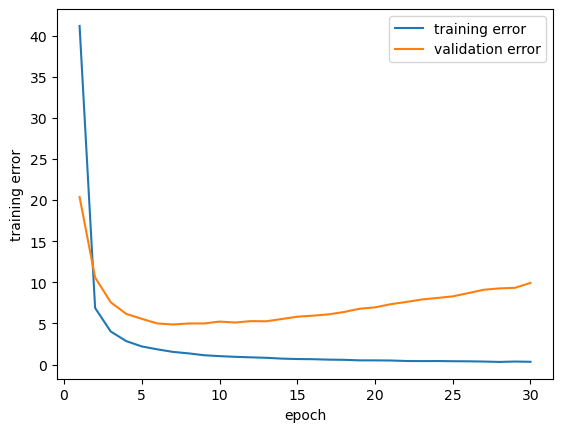

In [ ]:
def plot_losses(train_loss, val_loss):
    assert len(train_loss) == len(val_loss), "Train loss length and val loss length should be equal"
    epochs = len(train_loss)+1
    fig = plt.figure()
    plt.legend("training and validation error")
    plt.xlabel("epoch")
    plt.ylabel("training error")
    plt.plot(range(1, epochs), train_loss, label="training error")
    plt.plot(range(1, epochs), val_loss, label="validation error")
    plt.legend()
    plt.show()

plot_losses(training.tr_losses, training.val_losses)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.64].


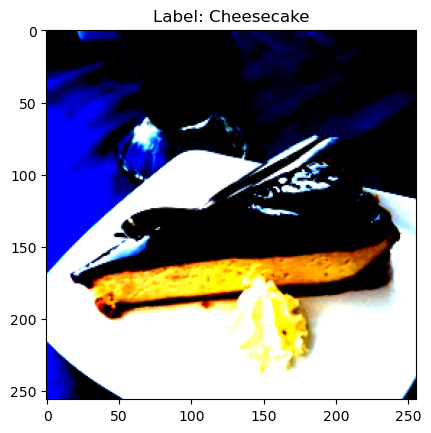

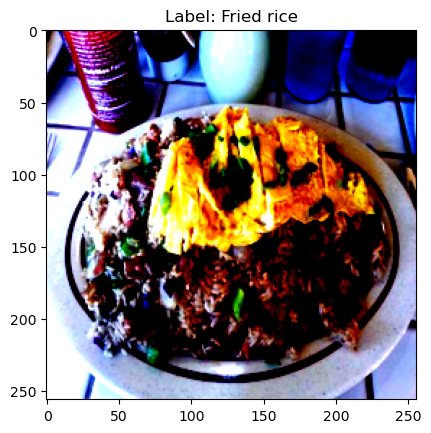

In [ ]:
def show_image(image, label):
    plt.figure()
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f"Label: {label}")
    
show_image(dt_train[799][0],dt_train.get_class_label(dt_train[799][1]))
show_image(dt_val[0][0],dt_val.get_class_label(dt_val[0][1]))

In [ ]:
import random
for i in range(10):
    idx = abs(random.gauss(100, .1))
    print(i,idx)

0 99.9418941556243
1 99.82137241897459
2 99.99722225044839
3 99.90006899047438
4 99.97848849061482
5 99.9718959846959
6 100.0749465590112
7 99.96392531926236
8 99.92372433967068
9 100.05925539950456
